## Monte Carlo Policy Evaluation


In [36]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib widget

The state of blackjack can be represented as (s, d, a), where

- s is the sum of the player's cards, with an A counting as 11. 12 <= s <= 21
- d is the dealer's card, with A being 1. 1 <= d <= 10
- a is whether the player holds an usable ace or not

The player's policy is represented by a function pi(s, d, a), which returns

- True if the player hits
- False if the player stands


In [ ]:
sum_returns = np.zeros((22, 11, 2))
num_visited = np.zeros((22, 11, 2))

pi = lambda s, d, a: s < 20

CARDS = [c for c in range(1, 10)] + [10] * 4
draw = lambda: random.choice(CARDS)

eps = 500000
for ep in range(eps):
    states = []
    r = None

    d = draw()
    s, a = 0, 0
    while s < 12:
        c = draw()
        a |= c == 1
        s += 11 if c == 1 and a == 0 else c
    states.append((s, d, a))

    while s < 21 and pi(s, d, a):
        s += draw()
        if s > 21:
            if a:
                s -= 10
                a = 0
            else:
                r = -1
                break
        states.append((s, d, a))
    if r == None:
        ds = 11 if d == 1 else d  # dealer's sum
        da = 1 if d == 1 else 0  # dealer's usable ace
        while ds < 12:
            c = draw()
            da |= c == 1
            ds += 11 if c == 1 and da == 0 else c
        while ds < 17 or (ds == 17 and da):
            ds += draw()
            if ds > 21:
                if da:
                    ds -= 10
                    da = 0
                else:
                    r = 1
                    break
        if r == None:
            r = 1 if s > ds else 0 if s == ds else -1

    for state in states:
        sum_returns[state] += r
        num_visited[state] += 1


values = np.zeros((22, 11, 2))
for s in range(12, 22):
    for d in range(1, 11):
        for a in range(2):
            state = (s, d, a)
            values[state] = (
                0
                if num_visited[state] == 0
                else sum_returns[state] / num_visited[state]
            )

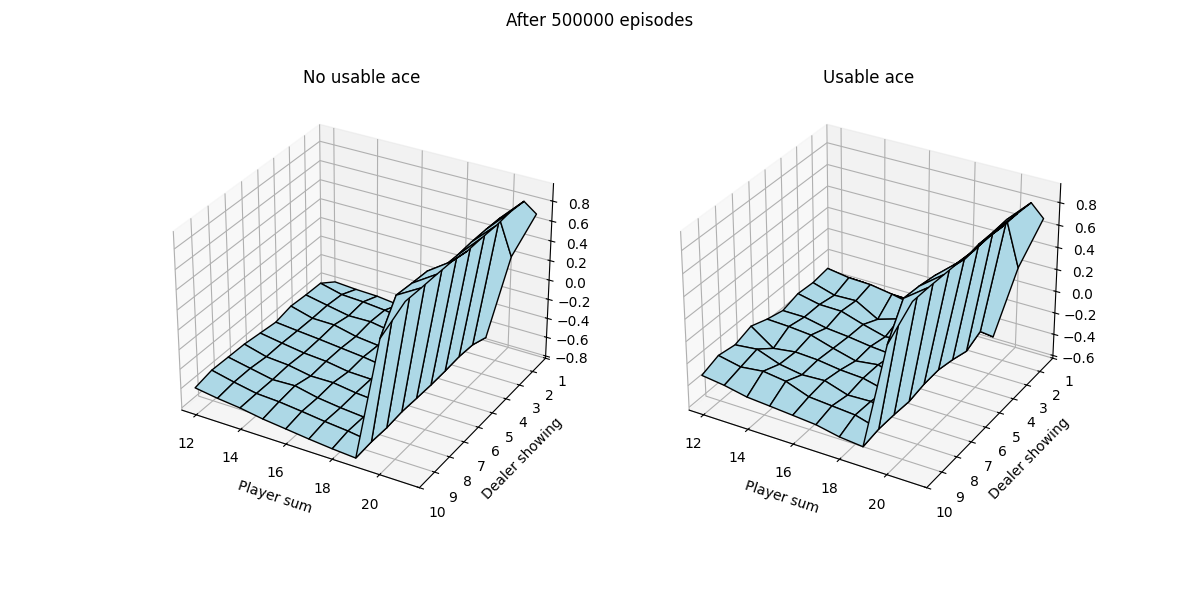

In [35]:
x = np.arange(12, 22)
y = np.arange(1, 11)
X, Y = np.meshgrid(x, y, indexing="ij")

no_ace = values[12:22, 1:11, 0]
with_ace = values[12:22, 1:11, 1]

fig, axes = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={"projection": "3d"})
fig.suptitle(f"After {eps} episodes")
# fig = plt.figure()
# ax = fig.add_subplot(111, projection="3d")

surface1 = axes[0].plot_surface(X, Y, no_ace, facecolor="lightblue", edgecolor="black")
axes[0].set_title("No usable ace")
axes[0].set_xlabel("Player sum")
axes[0].set_ylim(10, 1)
axes[0].set_ylabel("Dealer showing")

surface2 = axes[1].plot_surface(
    X, Y, with_ace, facecolor="lightblue", edgecolor="black"
)
axes[1].set_title("Usable ace")
axes[1].set_xlabel("Player sum")
axes[1].set_ylim(10, 1)
axes[1].set_ylabel("Dealer showing")

plt.show()

In [33]:
for a in (True, False):
    print(a)

True
False
